In [36]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
data = pd.read_csv("Data.csv")
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data.head()

,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
0,2017-01-01,"32Bungalows, Bhilai - CECB",NaN,NaN,"Bhilai RO Office, 5, 32 Bungalows, Bhilai, Dis...",Bhilai,21.194815,81.314770,Chhattisgarh
1,2017-01-01,"AIIMS, Raipur - CECB",NaN,NaN,"All India Institute Of Medical Science, Gate N...",Raipur,21.258815,81.578979,Chhattisgarh
2,2017-01-01,"Adarsh Nagar, Jaipur - RSPCB",NaN,NaN,"Psychiatric Centre, Janta Colony, Govind Marg,...",Jaipur,26.902909,75.836858,Rajasthan
3,2017-01-01,"Airoli, Navi Mumbai - MPCB",NaN,54.743723,NaN,Navi Mumbai,19.149400,72.998600,Maharashtra
4,2017-01-01,"Airport Area, Indore - IMC",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?
data.groupby("state")["PM2.5"].mean().idxmax()

'Delhi'

In [7]:
# Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?
data.query("`PM2.5` > 300 and Timestamp == 2023").groupby("state").size().idxmax()

'Bihar'

In [8]:
# Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)
data.groupby("state")["PM2.5"].var().idxmax()

'Delhi'

In [9]:
# Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?
data.query("Timestamp == 2020 or Timestamp == 2021").groupby("state")["PM2.5"].mean().idxmin()

'Mizoram'

In [10]:
# Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020
data.iloc[data[(data['Timestamp'].dt.year == 2020) & (data['Timestamp'].dt.month == 8)].dropna(subset=["PM2.5"])["PM2.5"].idxmax()]

Timestamp                                  2020-08-07 00:00:00
station          Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB
PM2.5                                                   805.51
PM10                                                143.776667
address      Inside Govt ITI College Compound, Jewargi Cros...
city                                                Kalaburagi
latitude                                             17.321993
longitude                                            76.822628
state                                                Karnataka
Name: 737399, dtype: object

In [11]:
# For the year 2018, calculate the average PM2.5 concentration for each
# season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) 
# for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB.
# Identifying the season with the highest pollution
winterAvg = data.loc[(data["Timestamp"].dt.year == 2018) & 
            (data["Timestamp"].dt.month.isin([12, 1, 2])) & 
            (data["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")]["PM2.5"].mean()
summerAvg = data.loc[(data["Timestamp"].dt.year == 2018) & 
            (data["Timestamp"].dt.month.isin([3, 4, 5])) & 
            (data["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")].dropna(subset=["PM2.5"])["PM2.5"].mean()
monsoonAvg = data.loc[(data["Timestamp"].dt.year == 2018) & 
            (data["Timestamp"].dt.month.isin([6, 7, 8, 9])) & 
            (data["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")]["PM2.5"].mean()
print(f"""
    Winter: {winterAvg}
    Summer: {summerAvg}
    Monsoon: {monsoonAvg}
    Therefore, Winter has highest Pollution
""")


    Winter: 67.4923443634478
    Summer: nan
    Monsoon: 34.42519611317571
    Therefore, Winter has highest Pollution



Weekday:
[ 114.231, 96.009, 67.166, 56.608, 47.181, 33.890, 35.898, 23.521, 23.515, 30.456, 117.583, 103.259 ]

Weekend:
[ 83.069, 70.265, 68.889, 67.416, 38.381, 34.555, 37.059, 31.355, 29.303, 37.962, 134.474, 76.780 ]


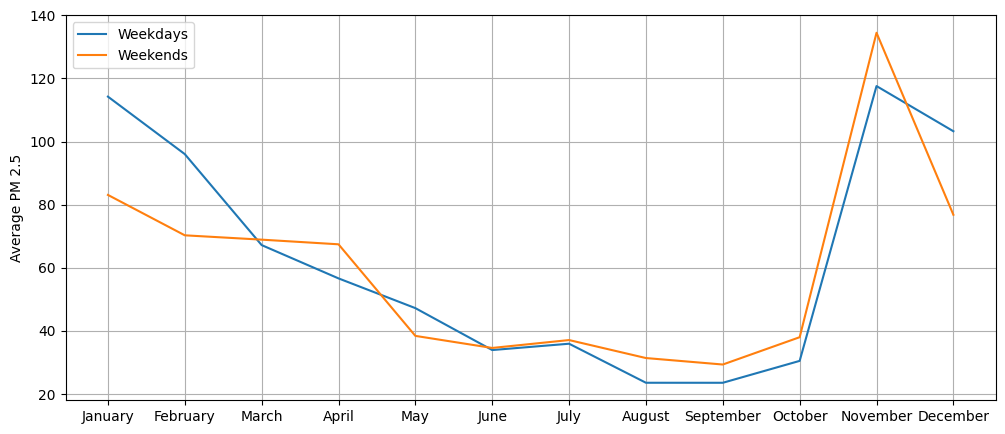

In [39]:
"""
Compare the average PM2.5 levels during weekends and weekdays for the station Lal
Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to
show these trends Steps:
a. Calculate the monthly average PM2.5 for weekdays and weekends separately
b. X-axis: Months (January to December).
c. Y-axis: Average PM2.5 levels.
d. Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends
"""
kspcb = data.loc[(data.station == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB") | (data.Timestamp.dt.year == 2021)]
weekdays = kspcb.loc[kspcb.Timestamp.dt.day.isin([1, 2, 3, 4, 5])]["PM2.5"].mean()
weekends = kspcb.loc[kspcb.Timestamp.dt.day.isin([6, 7])]["PM2.5"].mean()
monthsAvgWeekday = []
monthsAvgWeekend = []

#print(f"Weekday: {weekdays}\nWeekend: {weekends}")

for x in range(1, 13):
    monthsAvgWeekday.append(kspcb.loc[(kspcb["Timestamp"].dt.month.isin([x]) & (kspcb["Timestamp"].dt.day.isin([1, 2, 3, 4, 5])))]["PM2.5"].mean())
    monthsAvgWeekend.append(kspcb.loc[(kspcb["Timestamp"].dt.month.isin([x]) & (kspcb["Timestamp"].dt.day.isin([6, 7])))]["PM2.5"].mean())


print("Weekday:")
print("[", ", ".join(f"{x:.3f}" for x in monthsAvgWeekday), "]\n")

print("Weekend:")
print("[", ", ".join(f"{x:.3f}" for x in monthsAvgWeekend), "]")

plt.figure(figsize=(12, 5))
plt.plot(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
         monthsAvgWeekday, label="Weekdays")
plt.plot(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], 
         monthsAvgWeekend, label="Weekends")
plt.ylabel("Average PM 2.5")
plt.legend()
plt.grid()
plt.show()

In [13]:
"""
For each state, calculate the percentage increase or decrease in PM2.5 levels during
monsoon months (June to September) compared to summer months (March to May).
Which state has the most difference (increase or decrease) for the year 2022?
"""
earlyMonsoonAvg = data.loc[data.Timestamp.dt.month.isin([6])].groupby("state")["PM2.5"].mean()
lateMonsoonAvg = data.loc[data.Timestamp.dt.month.isin([9])].groupby("state")["PM2.5"].mean()

earlySummerAvg = data.loc[data.Timestamp.dt.month.isin([3])].groupby("state")["PM2.5"].mean()
lateSummerAvg = data.loc[data.Timestamp.dt.month.isin([5])].groupby("state")["PM2.5"].mean()

print(f"""
Percentage change during monsoon: \n{(lateMonsoonAvg - earlyMonsoonAvg) / earlyMonsoonAvg * 100}\n
Percentage change during summer: \n{(lateSummerAvg - earlySummerAvg) / earlySummerAvg * 100}
""")

earlyMonsoonAvg = data.loc[(data.Timestamp.dt.month.isin([6])) & (data.Timestamp.dt.year == 2022)].groupby("state")["PM2.5"].mean()
lateMonsoonAvg = data.loc[data.Timestamp.dt.month.isin([9])  & (data.Timestamp.dt.year == 2022)].groupby("state")["PM2.5"].mean()

earlySummerAvg = data.loc[data.Timestamp.dt.month.isin([3]) & (data.Timestamp.dt.year == 2022)].groupby("state")["PM2.5"].mean()
lateSummerAvg = data.loc[data.Timestamp.dt.month.isin([5]) & (data.Timestamp.dt.year == 2022)].groupby("state")["PM2.5"].mean()

print(f"""
Highest change during monsoon: \n{((lateMonsoonAvg - earlyMonsoonAvg) / earlyMonsoonAvg * 100).abs().idxmax()}\n
Highest change during summer: \n{((lateSummerAvg - earlySummerAvg) / earlySummerAvg * 100).abs().idxmax()}
""")


Percentage change during monsoon: 
state
Andhra Pradesh       -1.413721
Arunachal Pradesh    24.285294
Assam                 2.287166
Bihar               -27.678582
Chandigarh          -28.488410
Chhattisgarh        -27.001596
Delhi               -28.227898
Gujarat              -9.595315
Haryana             -33.664955
Himachal Pradesh     -9.769791
Jammu and Kashmir   -14.967343
Jharkhand           -26.394838
Karnataka            16.479544
Kerala               -1.477686
Madhya Pradesh      -15.305075
Maharashtra          -3.523226
Manipur              43.232308
Meghalaya            24.965793
Mizoram             -44.134062
Nagaland            -23.067821
Odisha              -26.265644
Puducherry           -6.967042
Punjab              -33.778807
Rajasthan           -25.466793
Sikkim              -12.394822
Tamil Nadu          -11.591992
Telangana             1.572551
Tripura              -2.592233
Uttar Pradesh       -24.574239
Uttarakhand         -40.319990
West Bengal         -14.6365

<Figure size 1000x500 with 0 Axes>

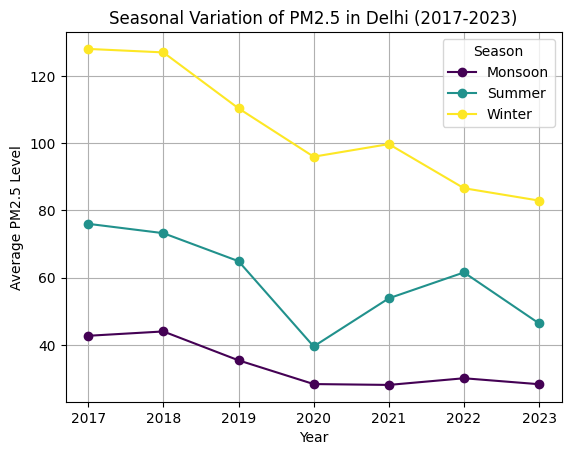

In [23]:
"""
Plot the average PM2.5 levels for Delhi across each season (Winter:
December-February, Summer: March-May, Monsoon: June-September) from 2017 to
2023. What seasonal variation, if any, can you observe in pollution levels?
"""
file_path = 'Data.csv'  
df = pd.read_csv(file_path, parse_dates=['Timestamp'])  
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Summer'
    elif month in [6, 7, 8, 9]:
        return 'Monsoon'
df['season'] = df['Timestamp'].dt.month.map(get_season)
df['year'] = df['Timestamp'].dt.year
df = df[(df['year'] >= 2017) & (df['year'] <= 2023)]
seasonal_pm25 = df.groupby(['year', 'season'])['PM2.5'].mean().unstack()
plt.figure(figsize=(10, 5))
seasonal_pm25.plot(marker='o', linestyle='-', colormap='viridis')

plt.xlabel('Year')
plt.ylabel('Average PM2.5 Level')
plt.title('Seasonal Variation of PM2.5 in Delhi (2017-2023)')
plt.legend(title="Season")
plt.grid(True)
plt.show()

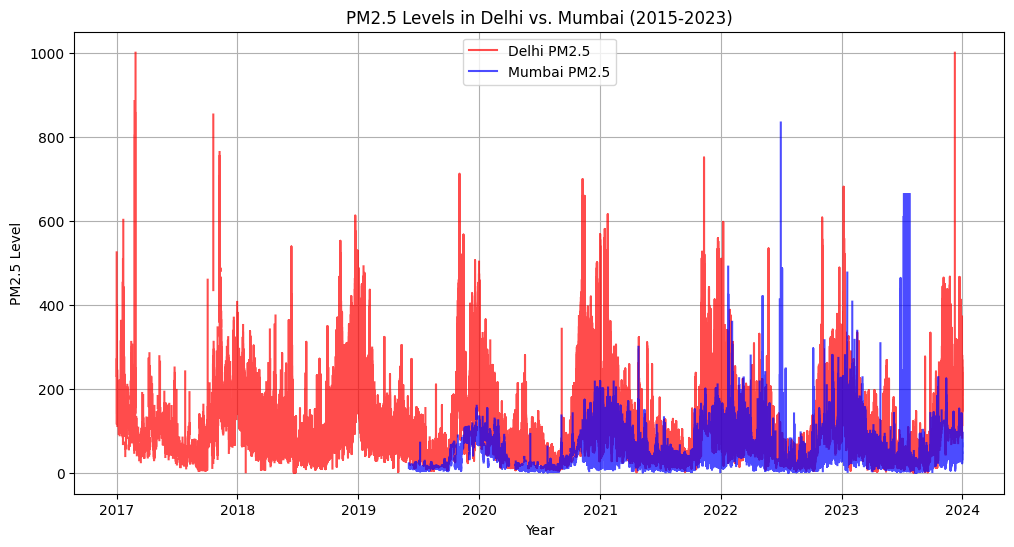

Delhi has more fluctuating PM2.5 levels compared to Mumbai between 2015 and 2023. 
        The red line, representing Delhi's PM2.5 levels, shows significantly higher peaks and valleys than the blue line, which represents Mumbai's PM2.5 levels. 
        This indicates greater volatility in Delhi's air quality during that period.
    


In [27]:
"""
Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to
2023. Which city had more fluctuations? (Hint: Think what fluctuation means)
"""
file_path = 'Data.csv'
df = pd.read_csv(file_path, parse_dates=['Timestamp'])
df = df[(df['Timestamp'].dt.year >= 2015) & (df['Timestamp'].dt.year <= 2023)]
delhi_data = df[df['city'] == 'Delhi'].set_index('Timestamp')['PM2.5']
mumbai_data = df[df['city'] == 'Mumbai'].set_index('Timestamp')['PM2.5']
plt.figure(figsize=(12, 6))
plt.plot(delhi_data, label='Delhi PM2.5', color='red', alpha=0.7)
plt.plot(mumbai_data, label='Mumbai PM2.5', color='blue', alpha=0.7)
plt.xlabel('Year')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 Levels in Delhi vs. Mumbai (2015-2023)')
plt.legend()
plt.grid(True)
plt.show()

print(
    """Delhi has more fluctuating PM2.5 levels compared to Mumbai between 2015 and 2023. 
        The red line, representing Delhi's PM2.5 levels, shows significantly higher peaks and valleys than the blue line, which represents Mumbai's PM2.5 levels. 
        This indicates greater volatility in Delhi's air quality during that period.
    """
)

In [18]:
"""
Which state in India has the highest number of monitoring stations relative to its population?
"""
df_stations = pd.read_csv('Data.csv')
df_population = pd.read_csv('State_data.csv')
stations_per_state = df_stations.groupby('state')['station'].count().reset_index()
stations_per_state.columns = ['State', 'Num_Stations']
df_merged = pd.merge(stations_per_state, df_population, on='State', how='inner')
df_merged['Stations_ratio'] = (df_merged['Num_Stations'] / df_merged['Population'])
df_result = df_merged.sort_values(by='Stations_ratio', ascending=False).reset_index(drop=True)
print("State with the highest number of monitoring stations relative to its population:")
print(df_result['State'][0])

State with the highest number of monitoring stations relative to its population:
Chandigarh


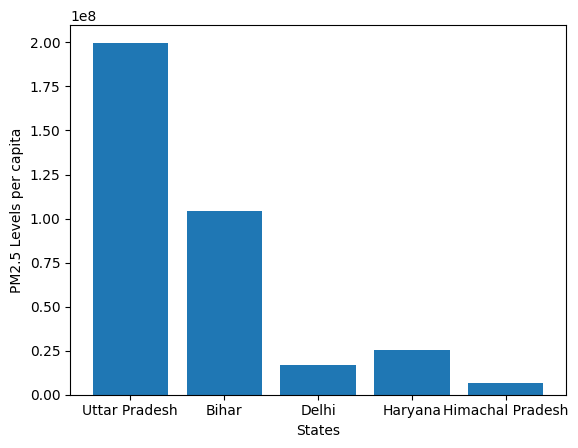

In [47]:
"""
Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5
exposure in 2023.
"""
data = pd.read_csv("Data.csv")
stateData = pd.read_csv("State_data.csv")
data["Timestamp"] = pd.to_datetime(data["Timestamp"])

pm25state = data.groupby("state")["PM2.5"].mean().sort_values(ascending=False).head(5)
states = stateData.loc[stateData["State"].isin(pm25state.keys())]
states = states.set_index("State")
states = states["Population"]

plt.bar(states.keys(), states.values)
plt.xlabel("States")
plt.ylabel("PM2.5 Levels per capita")
plt.show()

/tmp/ipykernel_688/2116945091.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(mergedData))


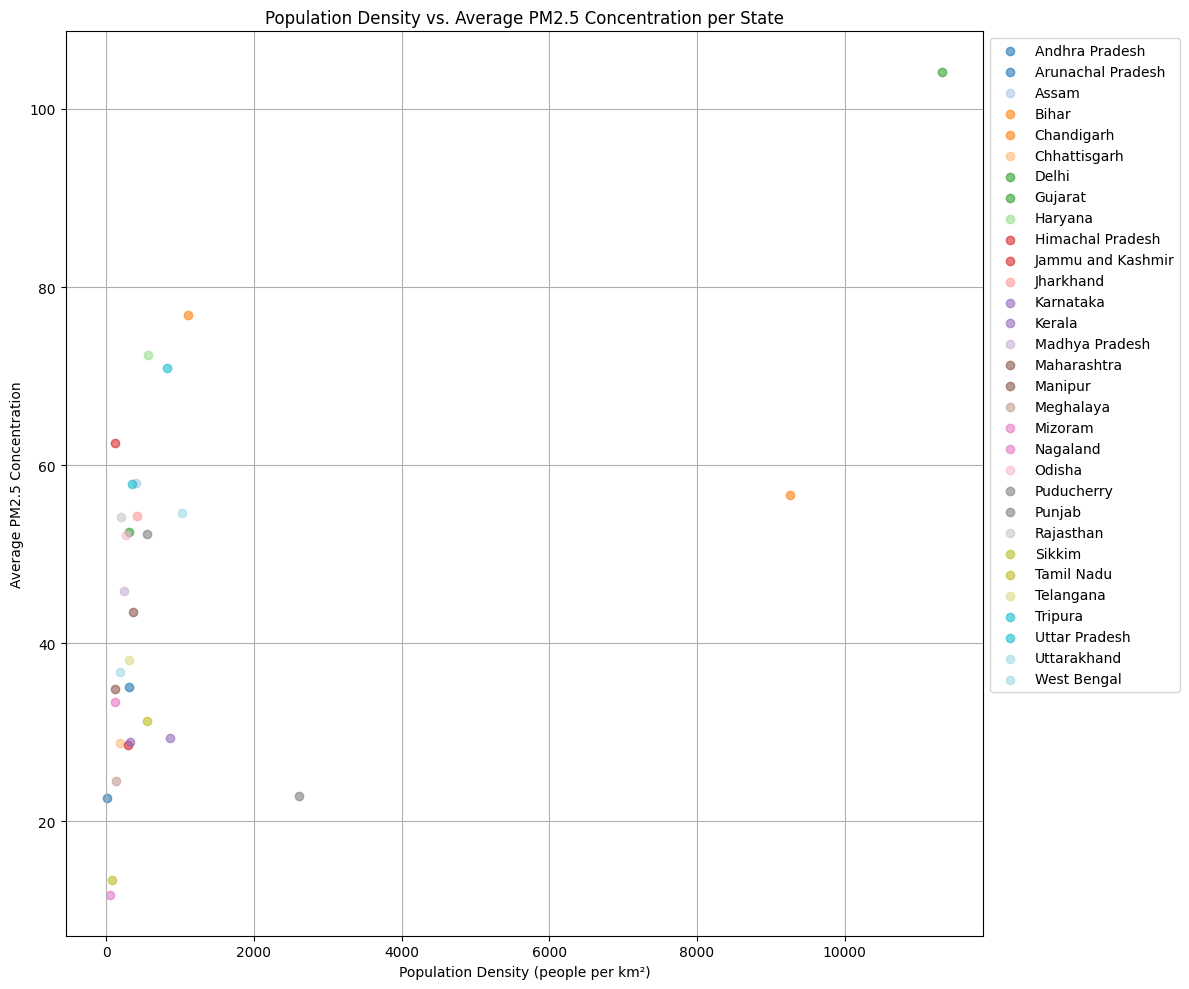

In [51]:
"""
Plot the relationship between population density and average PM2.5 concentration for
each state. What conclusion can you draw about the correlation between population
density and pollution?
a. X-axis: Population density (people per square kilometer).
b. Y-axis: Average PM2.5 concentration.
c. Use a scatter plot to show the relationship, where each point represents a state.
"""
import numpy as np

data = pd.read_csv("Data.csv")
stateData = pd.read_csv("State_data.csv")

data["Timestamp"] = pd.to_datetime(data["Timestamp"])

pm25State = data.groupby("state")["PM2.5"].mean()

stateData = stateData.set_index("State")
states = stateData.loc[pm25State.index]

states["populationDensity"] = states["Population"] / states["Area (km2)"]

mergedData = pd.merge(states, pm25State, left_index=True, right_index=True)
mergedData = mergedData[["populationDensity", "PM2.5"]]

colors = plt.cm.get_cmap('tab20', len(mergedData))

plt.figure(figsize=(12, 10))

for i, (state, row) in enumerate(mergedData.iterrows()):
    plt.scatter(row["populationDensity"], row["PM2.5"], color=colors(i), label=state, alpha=0.6)

plt.xlabel('Population Density (people per km²)')
plt.ylabel('Average PM2.5 Concentration')
plt.title('Population Density vs. Average PM2.5 Concentration per State')

handles, labels = plt.gca().get_legend_handles_labels()
byLabel = dict(zip(labels, handles))
plt.legend(byLabel.values(), byLabel.keys(), loc='upper left', bbox_to_anchor=(1, 1))

plt.grid(True)
plt.tight_layout()
plt.show()

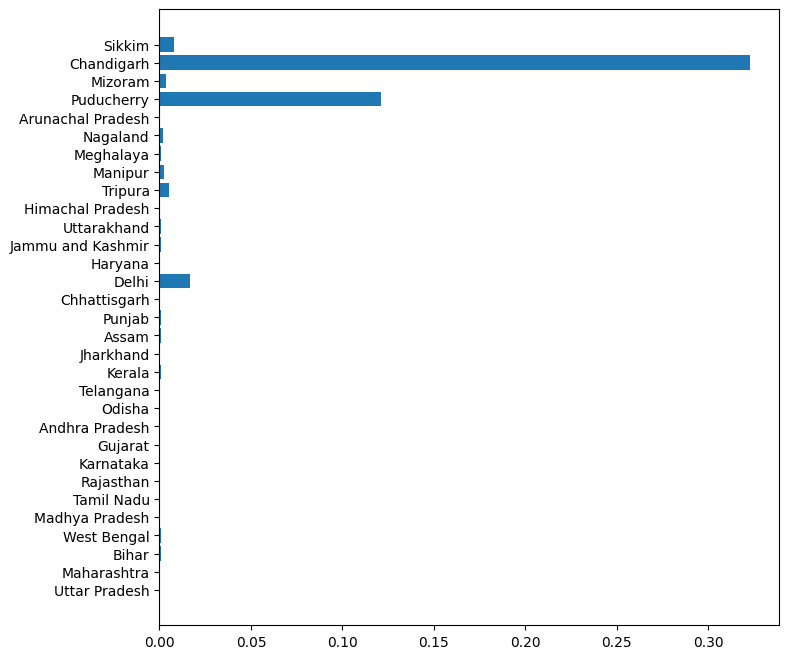

In [17]:
"""
Which state has the highest PM2.5 concentration per square kilometer? Plot the
pollution levels for all states relative to their area.
a. X-axis: States.
b. Y-axis: PM2.5 concentration per square kilometer.
c. Use a bar plot where each bar represents a state, and the height shows PM2.5
per sq km
"""
stateData = pd.read_csv("State_data.csv")
stateData = stateData.set_index("State")
avgPM2 = data.groupby("state")["PM2.5"].mean()
avgPM2Area = avgPM2.values / stateData["Area (km2)"]
plt.figure(figsize=(8, 8))
plt.barh(avgPM2Area.keys(), avgPM2Area.values)
plt.show()

State with highest density of monitoring stations: Delhi


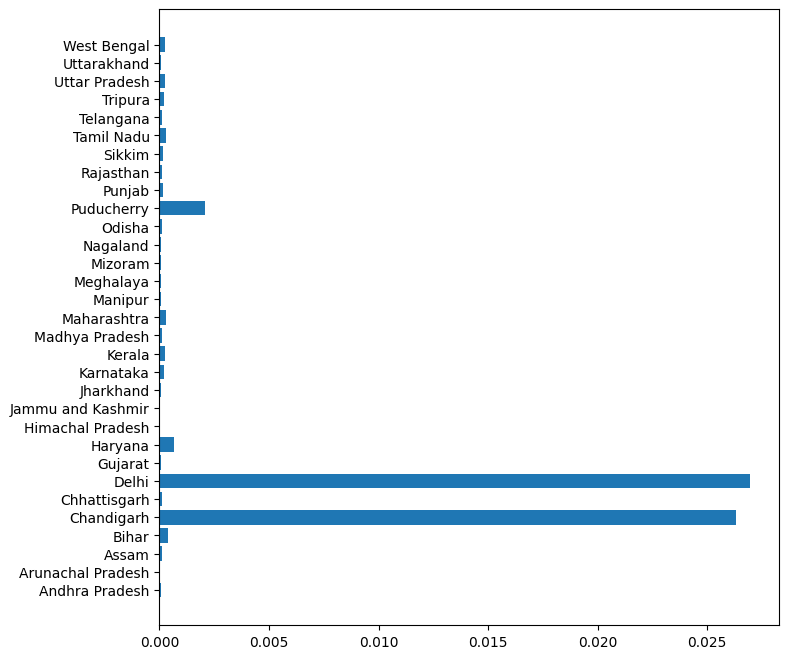

In [48]:
"""
Compare the total number of monitoring stations per square kilometer in each state.
Identify the state with the highest density of monitoring stations relative to its area. Show
a bar plot where each bar represents a state, and the height shows the number of
monitoring stations per square kilometer
"""
noOfStations = data.groupby("state")["station"].nunique()
stateData = pd.read_csv("State_data.csv")
stateData2 = stateData.set_index("State")

density = noOfStations/ stateData2["Area (km2)"]
density.index = noOfStations.keys()
plt.figure(figsize=(8, 8))
plt.barh(density.keys(), density.values)
print(f"State with highest density of monitoring stations: {density.idxmax()}")

In [19]:
"""
Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the
year 2021. Given that both states have similar area sizes but different population
densities, analyze how population density impacts pollution levels in these two states
"""
avgPM2 = data.loc[(data.Timestamp.dt.year == 2021) & 
                    ((data.state == "Madhya Pradesh") | (data.state == "Maharashtra"))].groupby("state")["PM2.5"].mean()
avgPM2 = avgPM2.to_frame()
stats = stateData.loc[(stateData.State == "Madhya Pradesh") | (stateData.State == "Maharashtra")]
stats = stats.eval("PD = Population/`Area (km2)`")
stats = stats.set_index("State")
avgPM2["Population Density"] = stats["PD"]
print("Average PM2.5 levels don't seem to matter much in this case.")
avgPM2

Average PM2.5 levels don't seem to matter much in this case.


,PM2.5,Population Density
state,,
Madhya Pradesh,47.095952,235.608557
Maharashtra,46.440044,365.192023


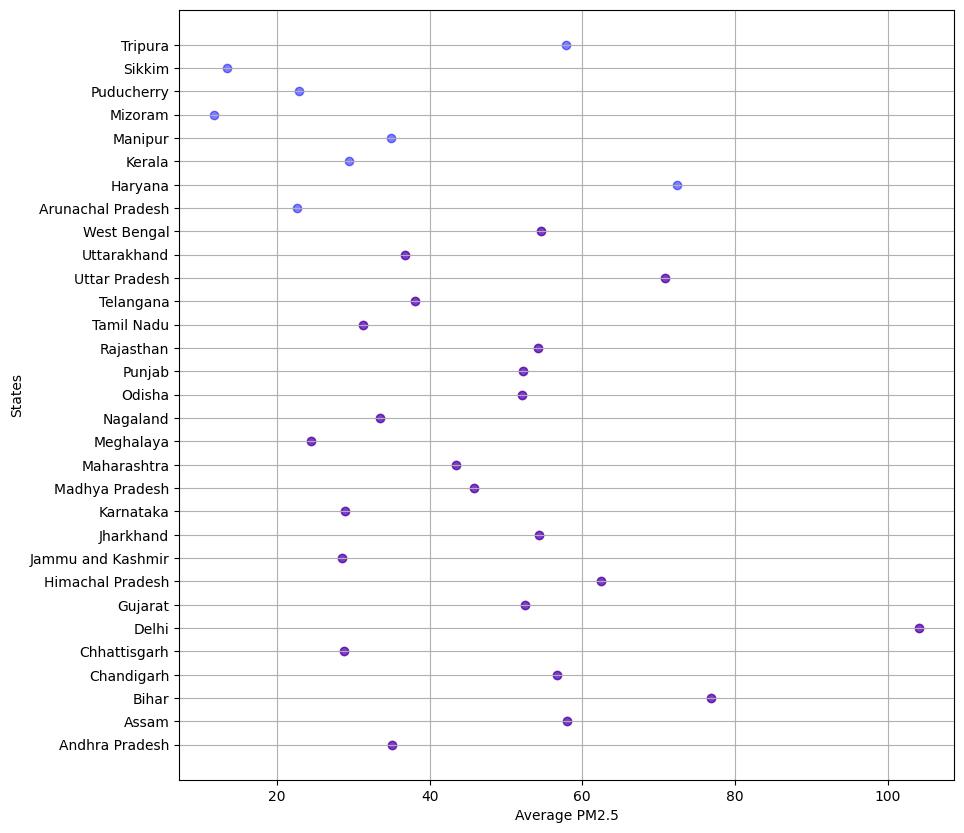

	Blue - Not Funded
	Purple - Funded


In [20]:
"""
Compare the average PM2.5 levels between states that received NCAP funding and
those that did not in 2021.
"""
funding = pd.read_csv("NCAP_Funding.csv")
funding.loc[funding.State == "Jammu & Kashmir", "State"] = "Jammu and Kashmir"
meanFunding = funding.groupby("State")["Total fund released"].mean().to_frame().reset_index()
avgPM25 = data.groupby("state")["PM2.5"].mean()
fundingData = pd.merge(avgPM25.to_frame().reset_index(), meanFunding, 
                       left_on="state", right_on="State", how="outer").rename(columns={"Total fund released": "fund"}).drop("State", axis=1)
fundingDataNotNa = fundingData.dropna()

plt.figure(figsize=(10, 10))
plt.scatter(fundingDataNotNa["PM2.5"], fundingDataNotNa["state"], color="red", alpha=0.5)
plt.scatter(fundingData["PM2.5"], fundingData["state"], color="blue", alpha=0.5)
plt.grid()
plt.xlabel("Average PM2.5")
plt.ylabel("States")
plt.show()
print("\tBlue - Not Funded\n\tPurple - Funded")

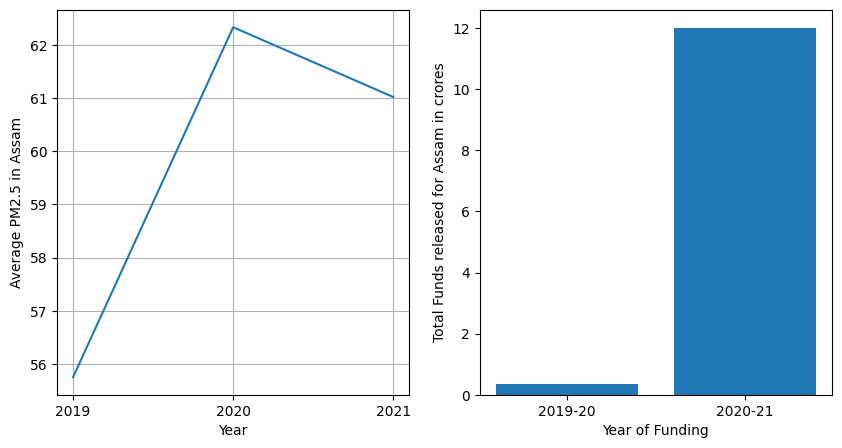

In [21]:
"""
Create a time series plot showing PM2.5 levels with an increment in NCAP funding for
Assam. Has an increment of the financing led to noticeable improvements in air quality?
"""
funding = funding.rename(columns={
    "State": "state",
    "Amount released during FY 2019-20": "2019-20",
    "Amount released during FY 2020-21": "2020-21",
    "Amount released during FY 2021-22": "2021-22",
})

fundingAssam = funding.loc[funding.state == "Assam"].copy()
fundingAssam["2019-20"] = funding.loc[funding.state == "Assam"]["2019-20"].astype(float)
fundingAssam["2020-21"] = funding.loc[funding.state == "Assam"]["2020-21"].astype(float)
fundingAssam["Utilisation as on June 2022"] = funding.loc[funding.state == "Assam"]["Utilisation as on June 2022"].astype(float)

fundingAssam = fundingAssam.drop(columns=["2021-22", "state", "City", "S. No.", "Total fund released", "Utilisation as on June 2022"]).sum().to_frame().T

polluAssam = {
    "2019": [0],
    "2020": [0],
    "2021": [0]
}
polluAssam["2019"] = data.loc[(data.state == "Assam") & (data.Timestamp.dt.year == 2019)]["PM2.5"].mean()
polluAssam["2020"] = data.loc[(data.state == "Assam") & (data.Timestamp.dt.year == 2020)]["PM2.5"].mean()
polluAssam["2021"] = data.loc[(data.state == "Assam") & (data.Timestamp.dt.year == 2021)]["PM2.5"].mean()

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(polluAssam.keys(), polluAssam.values())
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Average PM2.5 in Assam")
ax[0].grid()

ax[1].bar(fundingAssam.iloc[0].keys(), fundingAssam.iloc[0].values)
ax[1].set_xlabel("Year of Funding")
ax[1].set_ylabel("Total Funds released for Assam in crores")

plt.show()

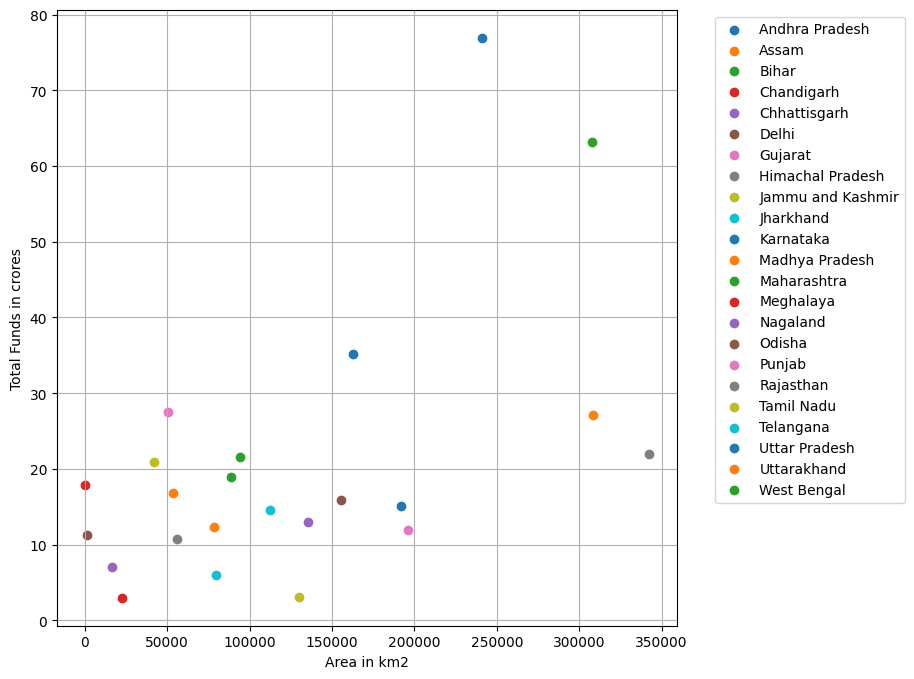

In [50]:
"""
Create a scatter plot to showcase the area versus funding received by a state. Mark
every state with a different color and show the legend outside the plot.
"""
stateData = pd.read_csv("State_data.csv")
funding = pd.read_csv("NCAP_Funding.csv")

funding.loc[funding.State == "Jammu & Kashmir", "State"] = "Jammu and Kashmir"

totalFund = funding.groupby("State")["Total fund released"].sum()

plt.figure(figsize=(8, 8))
for state, fund in totalFund.items():
    plt.scatter(stateData.loc[stateData.State == state, "Area (km2)"].values, fund, label=state)
plt.xlabel("Area in km2")
plt.ylabel("Total Funds in crores")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

In [23]:
"""
For the most polluted city in 2023 (highest average pollution in 2023), calculate the
percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)
"""
mostPolluCity = data.loc[data.Timestamp.dt.year == 2023].groupby("city")["PM2.5"].mean().idxmax()

pollu = data.loc[(data.city == mostPolluCity) & (data.Timestamp.dt.year == 2023)].dropna(subset=["PM2.5"])

print(f"""
    Most Polluted City: {mostPolluCity}
    Yearly percentage of days above the threshold: {(len(pollu.query("`PM2.5` > 300"))/365) * 100}
    Percentage of days when pollution is above threshold in available data: {(len(pollu.query("`PM2.5` > 300"))/len(pollu)) * 100}
""")


    Most Polluted City: Darbhanga
    Yearly percentage of days above the threshold: 0.821917808219178
    Percentage of days when pollution is above threshold in available data: 23.076923076923077



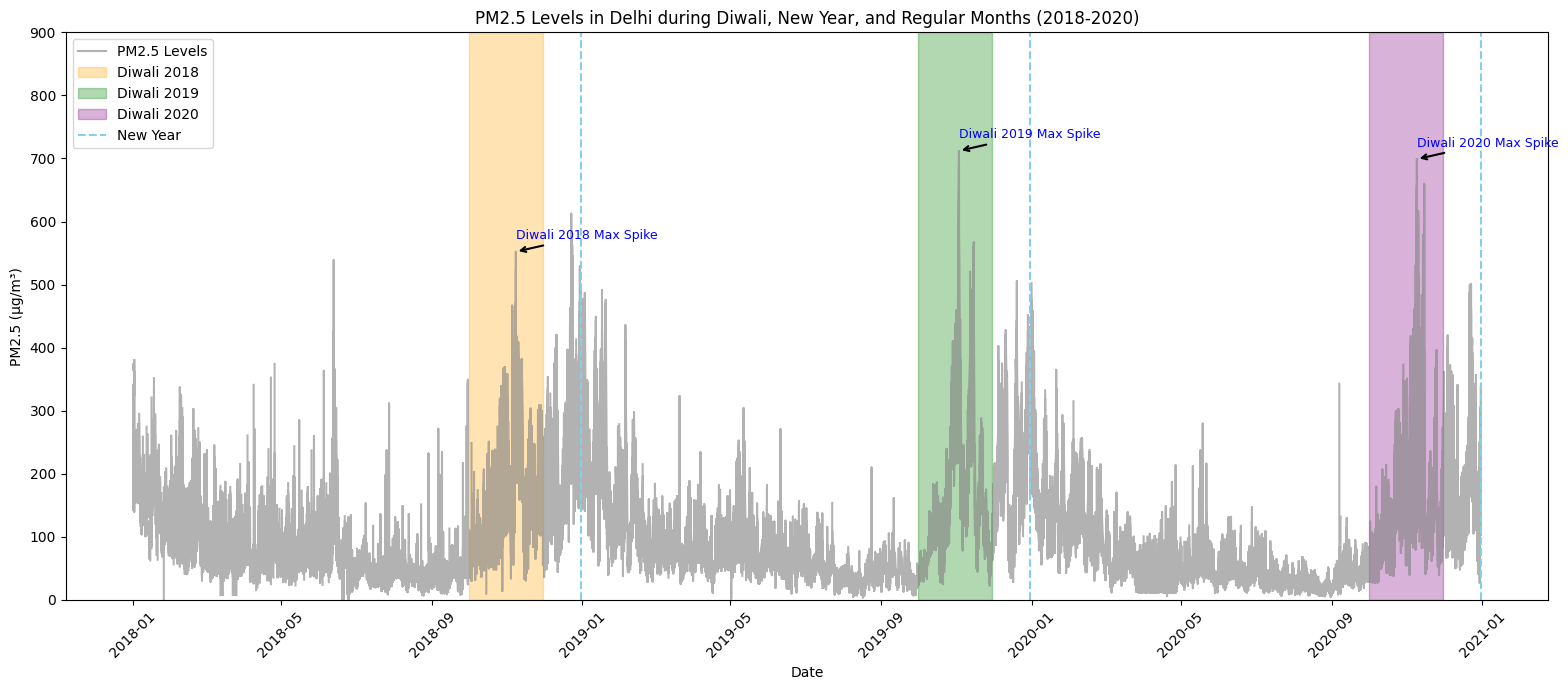

In [57]:
"""
Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year
compared to regular months over the 3 years (2018-2020). Do you observe any
significant pollution spikes during these festivals? If spikes are observed, Can you mark
these spikes using arrows?
"""
data = pd.read_csv("Data.csv")
data = data.rename(columns={"Timestamp": "timestamp"})
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%Y-%m-%d')

delhiData = data[(data['city'] == 'Delhi') & (data['timestamp'].dt.year.isin([2018, 2019, 2020]))]
newYearDates = pd.to_datetime(['2018-12-31', '2019-12-31', '2020-12-31'])
newYearData = delhiData[delhiData['timestamp'].isin(newYearDates)]
diwaliData = delhiData[delhiData['timestamp'].dt.month.isin([10, 11])]

plt.figure(figsize=(16,7))
plt.plot(delhiData['timestamp'], delhiData['PM2.5'], label='PM2.5 Levels', color='gray', alpha=0.6)

diwaliYears = [2018, 2019, 2020]
diwaliColors = ['orange', 'green', 'purple']
for i, year in enumerate(diwaliYears):
    plt.axvspan(f'{year}-10-01', f'{year}-11-30', color=diwaliColors[i], alpha=0.3, label=f'Diwali {year}' "")
for year in newYearDates.year:
    plt.axvline(pd.to_datetime(f'{year}-12-31'), color='skyblue', linestyle='--', label=f'New Year' if year == newYearDates.year[0] else "")
for year in diwaliYears:
    diwaliPeriod = delhiData[(delhiData['timestamp'].dt.year == year) & (delhiData['timestamp'].dt.month.isin([10, 11]))]
    topSpike = diwaliPeriod.loc[diwaliPeriod['PM2.5'].idxmax()]
    plt.annotate(f'Diwali {year} Max Spike', 
                 xy=(topSpike['timestamp'], topSpike['PM2.5']), 
                 xytext=(topSpike['timestamp'], topSpike['PM2.5'] + 20), 
                 arrowprops=dict(facecolor='blue', arrowstyle='->', lw=1.5),
                 fontsize=9, color='blue')

plt.title('PM2.5 Levels in Delhi during Diwali, New Year, and Regular Months (2018-2020)')
plt.xlabel('Date')
plt.ylabel('PM2.5 (µg/m³)')
plt.ylim(0, 900)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

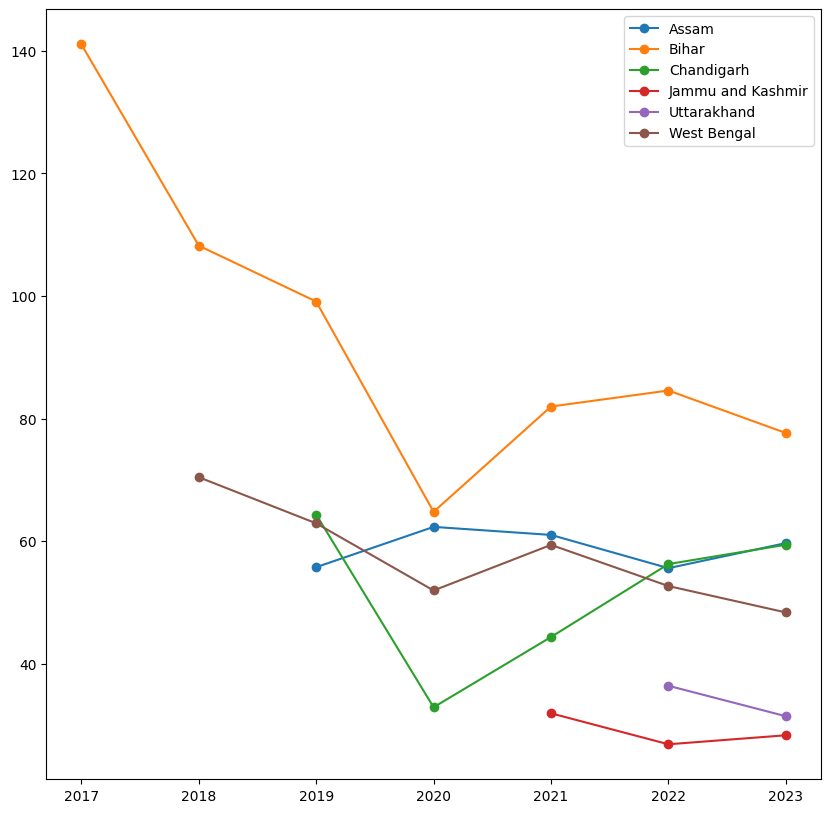

In [25]:
"""
Identify the state that received the highest NCAP funding in 2020 and determine if its air
pollution levels improved significantly by 2023. Use a line graph to compare yearly
average PM2.5 trends
"""
funding = pd.read_csv("NCAP_Funding.csv").drop(columns=["S. No."])

funding = funding.rename(columns={
    "State": "state",
    "Amount released during FY 2019-20": "2019-20",
    "Amount released during FY 2020-21": "2020-21",
    "Amount released during FY 2021-22": "2021-22",
})
funding.loc[funding.state == "Jammu & Kashmir", "state"] = "Jammu and Kashmir"

statesHighFund = funding.loc[funding["2020-21"] == funding.loc[~(funding["2020-21"] == "-")]["2020-21"].max()]["state"].values

years = [2017+i for i in range(0, 7)]

plt.figure(figsize=(10, 10))
for state in statesHighFund:
    plt.plot(years, 
                [data.loc[(data.Timestamp.dt.year == year) & (data.state == state)].dropna(subset=["PM2.5"])["PM2.5"].mean() for year in years], 
                label=state,
                marker='o')
plt.xticks(years)
plt.legend()
plt.show()

In [26]:
%pip install geopandas

Note: you may need to restart the kernel to use updated packages.


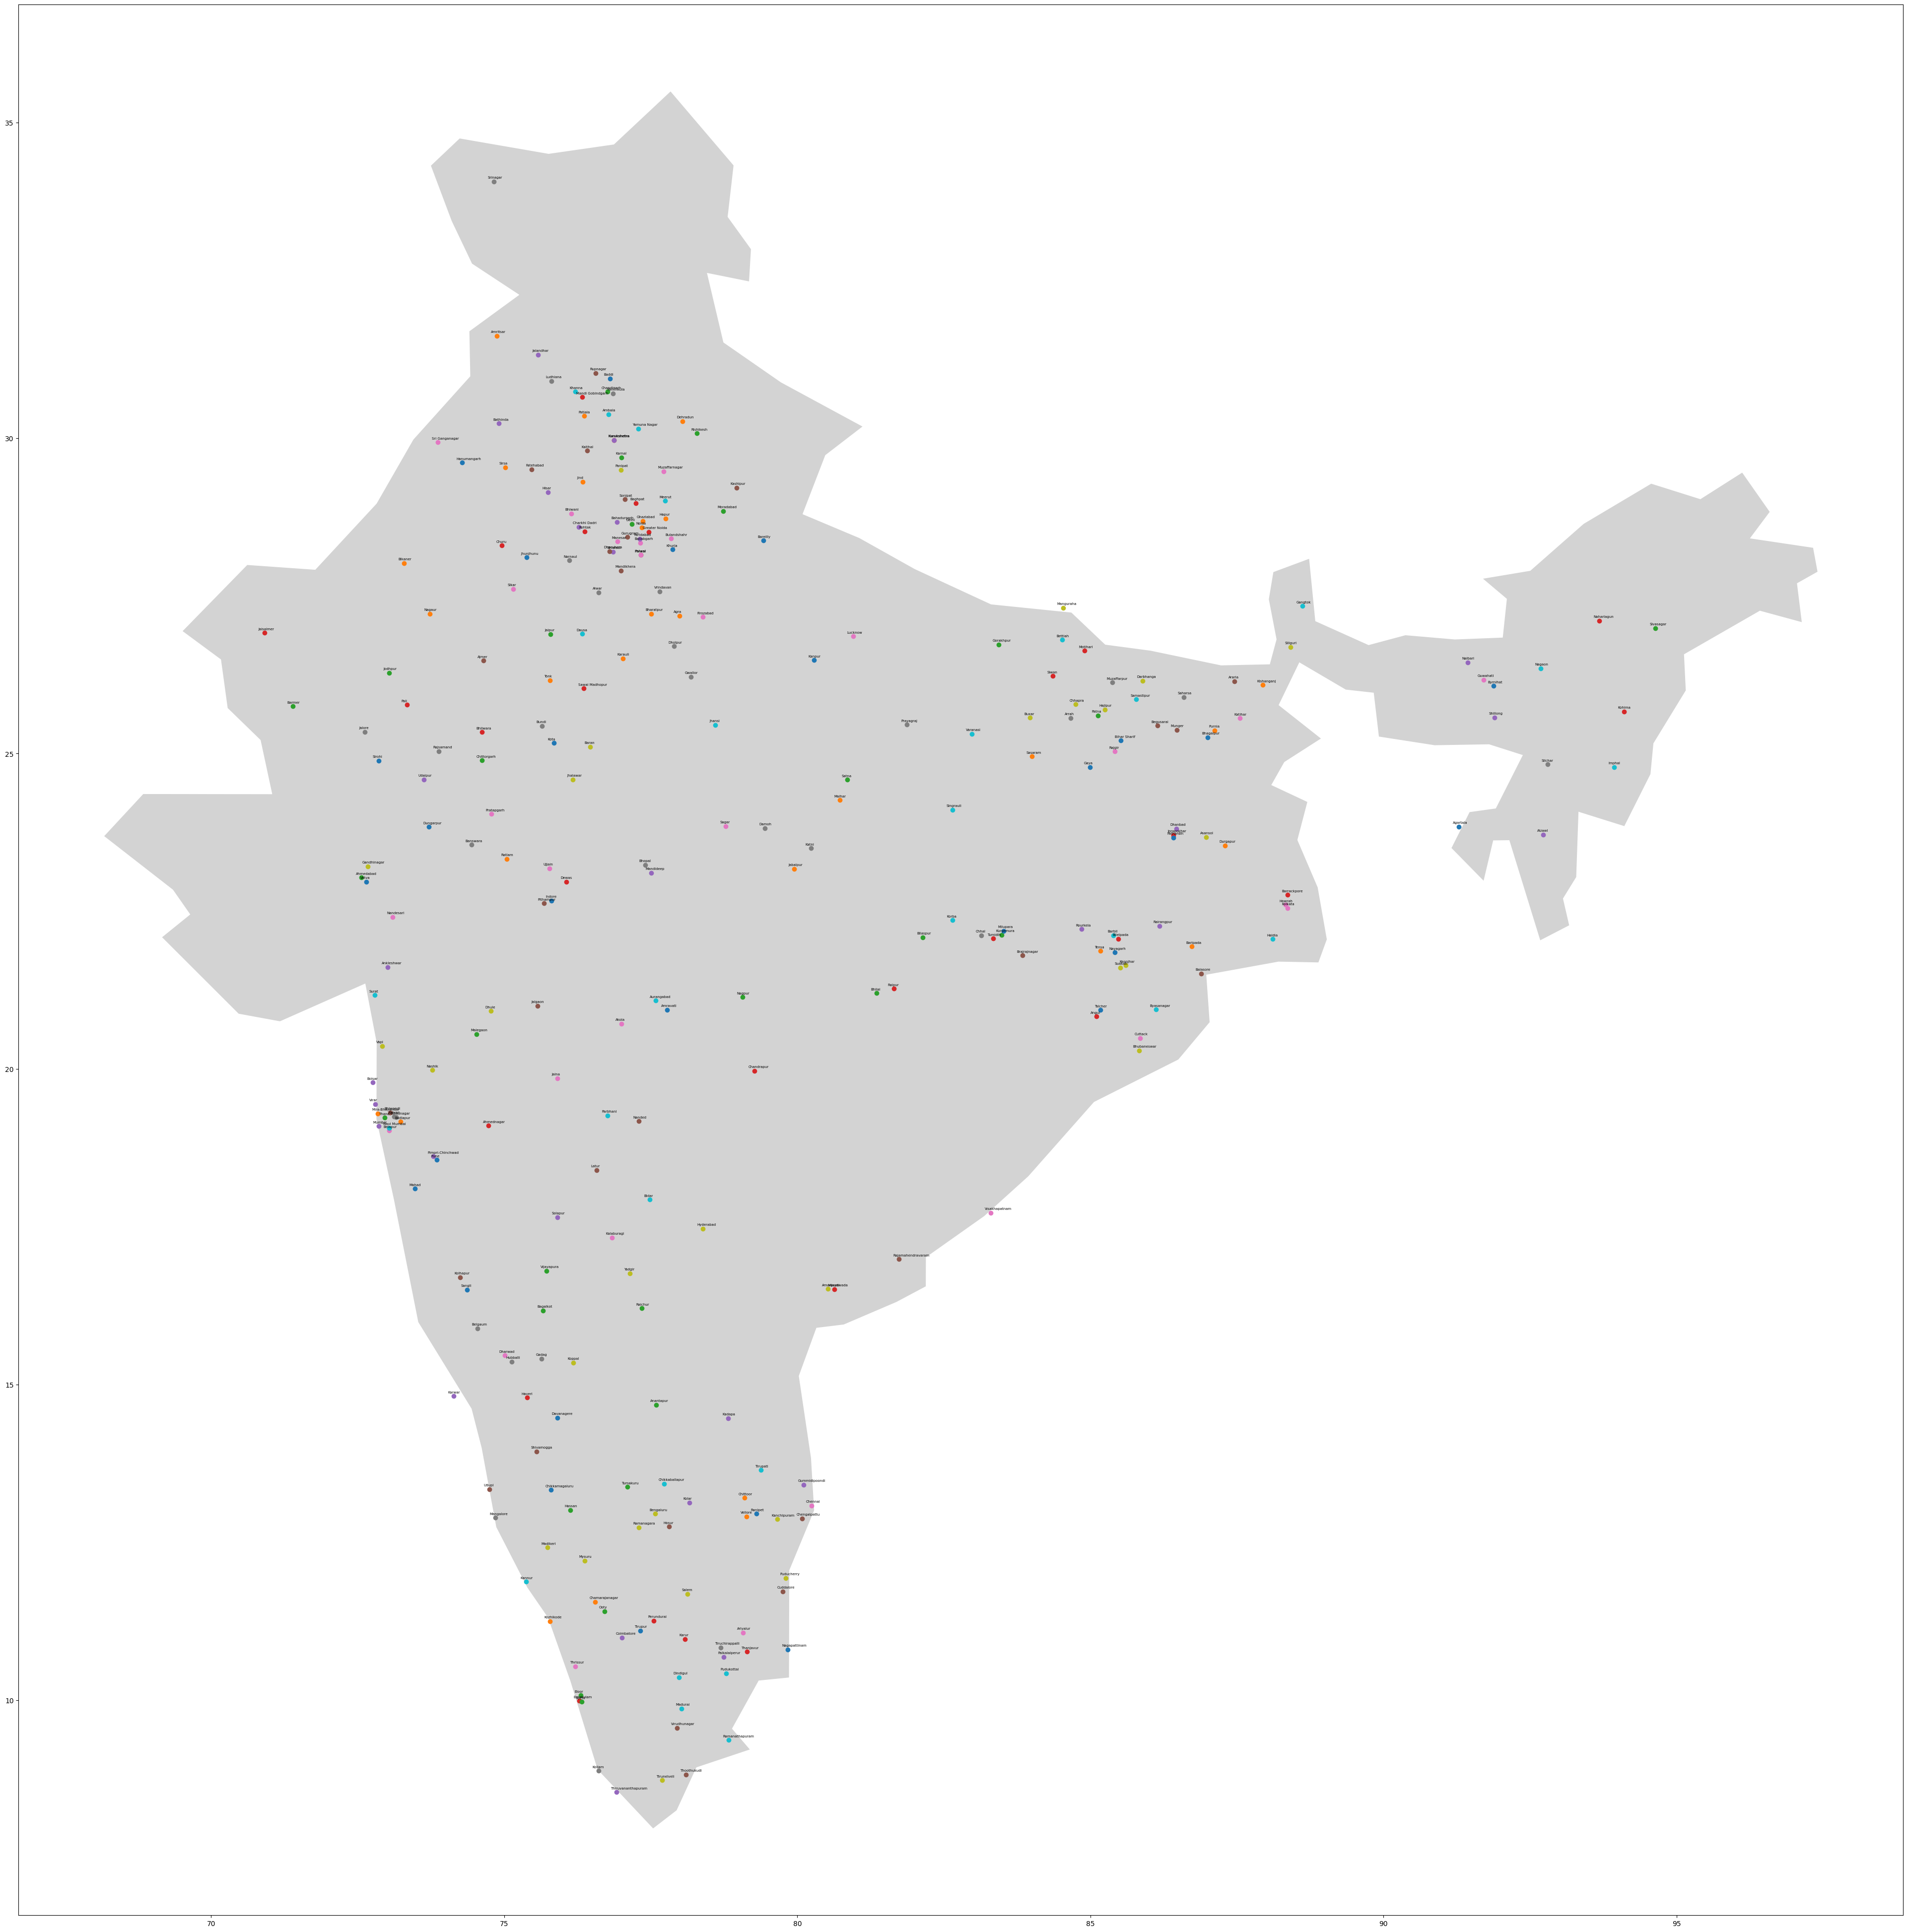

In [27]:
"""
Draw the map of India and plot the sensor locations on the map
"""
import geopandas as gpd

world = gpd.read_file("ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp")
india = world[world.ADMIN == "India"]

fig, ax = plt.subplots(figsize=(50, 50))
india.plot(ax = ax, color="lightgray")

cities = data.groupby("city").agg({"longitude": "mean", "latitude": "mean"})

for city, row in cities.iterrows():
    long = row["longitude"]
    lat = row["latitude"]
    ax.scatter(long, lat)
    ax.text(long-0.1, lat+0.05, city, fontsize=5)

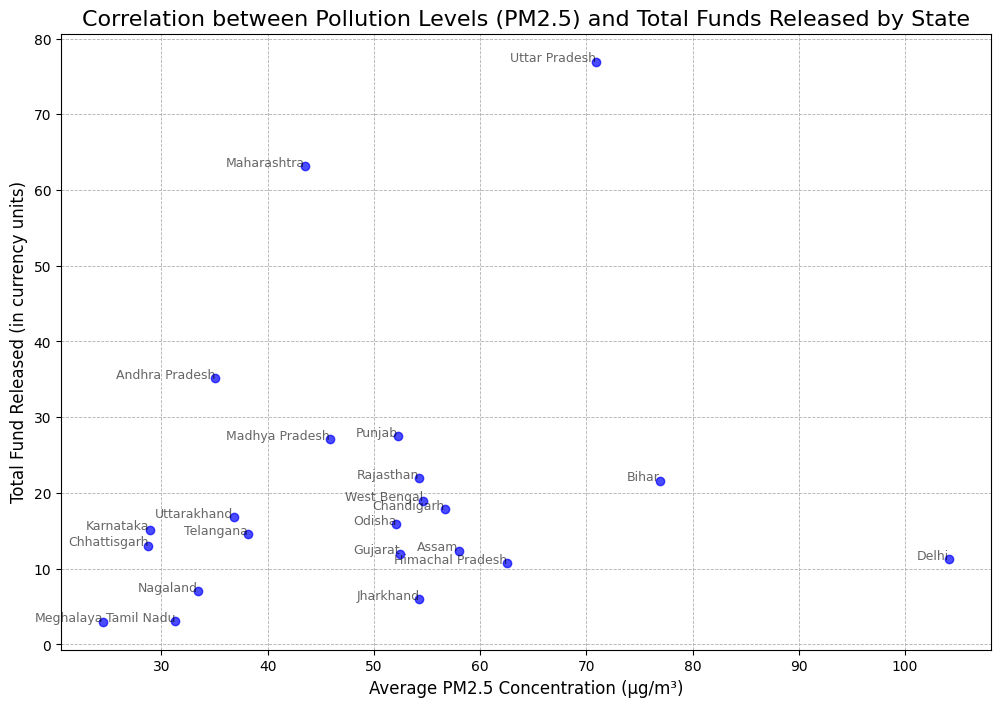

In [58]:
"""
Tell us something interesting from the dataset that we have not asked. Anything that
intrigues you, anything that might be useful to the policymakers.
"""

data = pd.read_csv("Data.csv", encoding='utf-8')
stateData = pd.read_csv("State_data.csv", encoding='utf-8')

data.columns = data.columns.str.lower()
stateData.columns = stateData.columns.str.lower()
ncapFunding.columns = ncapFunding.columns.str.lower()

stateFunding = ncapFunding.groupby('state')['total fund released'].sum().reset_index()

statePollution = data.groupby('state')['pm2.5'].mean().reset_index()

mergedData = pd.merge(stateFunding, statePollution, on='state', how='left')

mergedDataClean = mergedData.dropna(subset=['pm2.5'])

plt.figure(figsize=(12, 8))

plt.scatter(mergedDataClean['pm2.5'], mergedDataClean['total fund released'], color='b', alpha=0.7)

for i in range(len(mergedDataClean)):
    plt.text(mergedDataClean['pm2.5'].iloc[i],
             mergedDataClean['total fund released'].iloc[i],
             mergedDataClean['state'].iloc[i],
             fontsize=9,
             color='black',
             alpha=0.6,
             horizontalalignment='right')

plt.title('Correlation between Pollution Levels (PM2.5) and Total Funds Released by State', fontsize=16)
plt.xlabel('Average PM2.5 Concentration (µg/m³)', fontsize=12)
plt.ylabel('Total Fund Released (in currency units)', fontsize=12)

plt.grid(True, linestyle='--', linewidth=0.6)
plt.show()

We would expect that states with higher pollution get more funds. But, there is some disparity, as we can see Delhi has a lot of pollution but the funds it recieves are comparatively less.

But this might not be a problem of insufficient funds in the first place, because the other states span a huge area with more rural areas than Delhi, we can say that the average pollution would be lesser but the data represented in this way would be misleading, because the urbanised areas in these states with less pollution and more funds may have urbanised cities where the pollution is high and may therefore need higher funds to combat pollution.

Therefore, one could look at the graph and say funds are being mismanaged since some states with high pollution are given less funds comparatively, but that is not the whole picture and hence it's important to carefully consider the data being plotted or shown before coming to a conclusion